No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de classificação e regressão.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em Python puro e Numpy
- Utilizar o perceptron para regressão e classificação

# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1,...,x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1,...,w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$\widehat{y}_i = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos de uma amostra que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$f = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $\widehat{y}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.

## Regra de Aprendizado do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - \widehat{y}_i)x_i$$
<br>
$$b_i = b_i + \lambda(y_i - \widehat{y}_i)$$

Onde $\lambda$ é a __taxa de aprendizagem__ (___learning rate___).

Repare que $y_i - \widehat{y}_i$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($\widehat{y}_i$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - \widehat{y}_i = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - \widehat{y}_i$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $\widehat{y}_i = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $\widehat{y}_i = 0$), __os pesos tendem a aumentar__.

# Imports e Configurações

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

%matplotlib inline

## Porta AND/OR

In [4]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# porta OR
#y = np.array([0, 1, 1, 1])

# porta AND
y = np.array([0, 0, 0, 1]).T 

print(x.shape, y.shape)

(4, 2) (4,)


### Python

In [5]:
d = x.shape[1]

w = [2 * random() - 1 for i in range(d)]

b = 2 * random() - 1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        
        error = y_n - y_pred
        
        w = [(w_i + learning_rate * error * x_i) for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate * error
        
        cost += error**2
    
    if step % 10 == 0:
        print(f'step {step}: {cost}')
        
print(f'w: {w}')
print(f'b: {b}')
print(f't_pred: {np.dot(x, np.array(w)) + b}')

step 0: 1
step 10: 1
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.34475481530267515, 0.030949746040221493]
b: -0.35741491606337505
t_pred: [-0.35741492 -0.32646517 -0.0126601   0.01828965]


### Numpy

In [6]:
d = x.shape[1]

w = 2 * np.random.random(size=d) - 1

b = 2 * np.random.random() - 1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        
        error = y_n - y_pred
        
        w = w + learning_rate * np.dot(error, x_n)
        b = b + learning_rate * error
        
        cost += error**2
        
    if step % 10 == 0:
        print(f'step {step}: {cost}')
        
print(f'w: {w}')
print(f'b: {b}')
print(f't_pred: {np.dot(x, np.array(w)) + b}')

step 0: 3
step 10: 2
step 20: 2
step 30: 2
step 40: 1
step 50: 2
step 60: 2
step 70: 1
step 80: 2
step 90: 0
step 100: 0
w: [0.26280064 0.00418379]
b: -0.2645586217975752
t_pred: [-0.26455862 -0.26037483 -0.00175798  0.00242581]


## Exercício de Classificação

(100, 2) (100,)


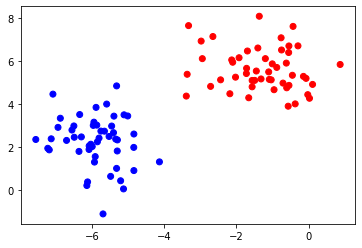

In [7]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [8]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

step 0: 10
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.16267807798192355, 0.09139329100351865]
b: 0.31553863975972796


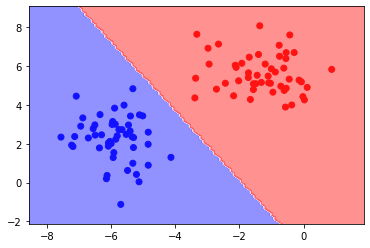

In [11]:
d = x.shape[1]

w = [2 * random() - 1 for i in range(d)]

b = 2 * random() - 1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        
        error = y_n - y_pred
        
        w = [(w_i + learning_rate * error * x_i) for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate * error
        
        cost += error**2
    
    if step % 10 == 0:
        print(f'step {step}: {cost}')
        
print(f'w: {w}')
print(f'b: {b}')

plot_linear_classifier(x, y, w, b)

### Numpy

step 0: 19
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.11540565 0.0832347 ]
b: 0.15671621496549915


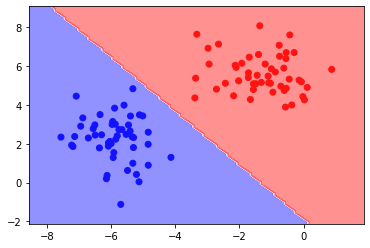

In [12]:
d = x.shape[1]

w = 2 * np.random.random(size=d) - 1

b = 2 * np.random.random() - 1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        
        error = y_n - y_pred
        
        w = w + learning_rate * np.dot(error, x_n)
        b = b + learning_rate * error
        
        cost += error**2
        
    if step % 10 == 0:
        print(f'step {step}: {cost}')
        
print(f'w: {w}')
print(f'b: {b}')

plot_linear_classifier(x, y, w, b)